In [0]:
#Load the dataset
from keras.datasets import imdb

((XT,YT),(Xt,Yt))=imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
print(len(XT))
print(XT[0])

In [0]:
word_idx=imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
print(word_idx.items())

In [0]:
idx_word = dict([value,key] for (key,value) in word_idx.items())
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
print(actual_review)
print(len(actual_review.split()))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [0]:
# # Create a 2D Tensor to be processed by the embedding layer
from keras.preprocessing import sequence
#to have equal length of each sentence we use this.if words not present it will be pad with 0
X_train=sequence.pad_sequences(XT,maxlen=500)
X_test=sequence.pad_sequences(Xt,maxlen=500)



In [0]:
print(X_train.shape)

(25000, 500)


In [0]:
# Create a Model in Keras

from keras.layers import Embedding,SimpleRNN,Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [0]:
from keras.callbacks import ModelCheckpoint # save the best model, fight overfiitting
from keras.callbacks import EarlyStopping #save time


checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
earlystop = EarlyStopping(monitor='val_acc',patience=1)



hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.5347 - acc: 0.7304 - val_loss: 0.3907 - val_acc: 0.8402
Epoch 2/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.3289 - acc: 0.8652 - val_loss: 0.3419 - val_acc: 0.8628
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.2421 - acc: 0.9067 - val_loss: 0.3630 - val_acc: 0.8456


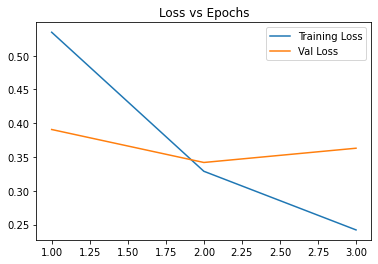

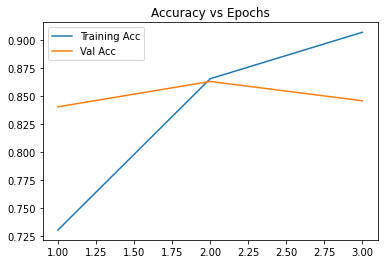

In [0]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()



plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

In [0]:
model.load_weights("best_model.h5")

In [0]:
model.evaluate(X_test,Yt)  

25000/25000 [==============================] - 18s 716us/step


[0.3415854134941101, 0.860480010509491]